In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
img1 = cv2.imread('book.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('book2.jpg', cv2.IMREAD_GRAYSCALE)

In [26]:
if img1 is None or img2 is None:
    raise ValueError("Images not found. Please upload 'image1.jpg' and 'image2.jpg'")

In [27]:
sift = cv2.SIFT_create()

In [28]:
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [29]:
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

In [30]:
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])

H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)
matches_mask = mask.ravel().tolist()

In [31]:
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                              matchesMask=matches_mask,
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

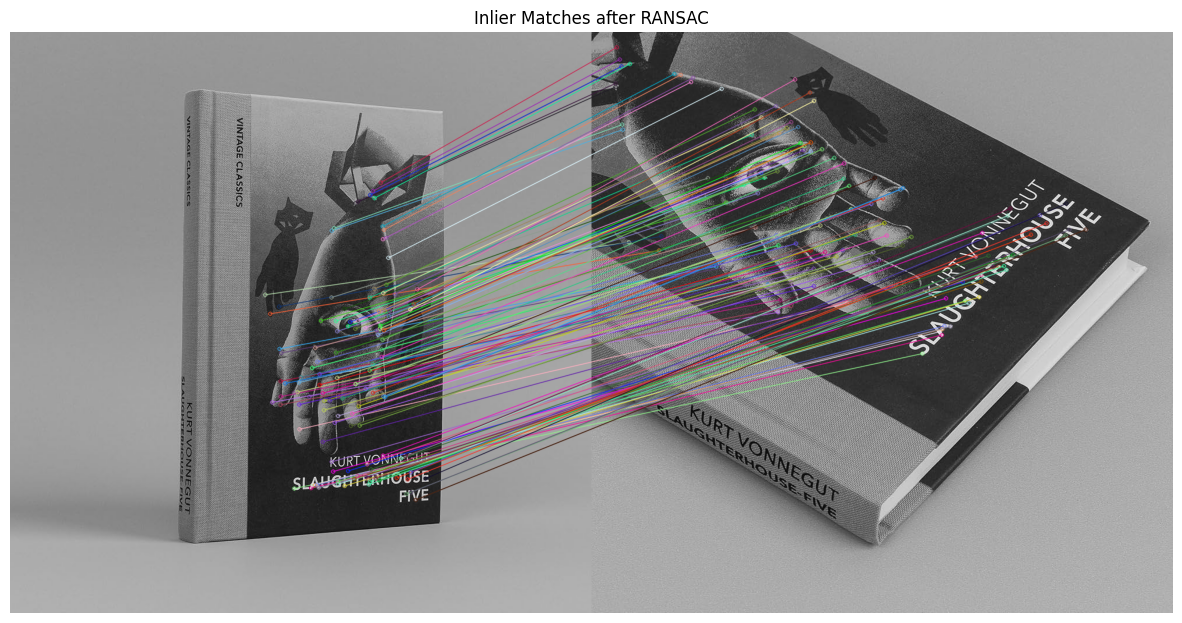

In [32]:
plt.figure(figsize=(15, 10))
plt.imshow(img_matches)
plt.title('Inlier Matches after RANSAC')
plt.axis('off')
plt.show()